In [6]:
import json
import collections
import matplotlib.pyplot as plt
import numpy as np
import re
from wordcloud import WordCloud 
import pandas as pd

In [2]:
with open('data/processed_trumptwitterarchive.txt', 'r') as data_file:
    json_data = data_file.read()

data = json.loads(json_data)

print("Dataset contains " + str(len(data)) + " twitters")

Dataset contains 42692 twitters


In [5]:
data[0]

{'source': 'Twitter for iPhone',
 'text': 'Dow hits 28,000 - FIRST TIME EVER, HIGHEST EVER! Gee, Pelosi &amp; Schitt have a good idea, “lets Impeach the President.” If something like that ever happened, it would lead to the biggest FALL in Market History. It’s called a Depression, not a Recession! So much for 401-K’s &amp; Jobs!',
 'created_at': 'Sat Nov 16 15:18:27 +0000 2019',
 'retweet_count': 4301,
 'favorite_count': 15011,
 'is_retweet': False,
 'id_str': '1195722806274736129',
 'tokenized_text': ['Dow',
  'hits',
  '28,000',
  '-',
  'FIRST',
  'TIME',
  'EVER',
  ',',
  'HIGHEST',
  'EVER',
  '!',
  'Gee',
  ',',
  'Pelosi',
  '&',
  'Schitt',
  'have',
  'a',
  'good',
  'idea',
  ',',
  '“',
  'lets',
  'Impeach',
  'the',
  'President',
  '.',
  '”',
  'If',
  'something',
  'like',
  'that',
  'ever',
  'happened',
  ',',
  'it',
  'would',
  'lead',
  'to',
  'the',
  'biggest',
  'FALL',
  'in',
  'Market',
  'History',
  '.',
  'It’s',
  'called',
  'a',
  'Depression',
 

1 Impact Analysis

We are curious to see the social impact of Donald's Twitter and how his followers response to his posts. 

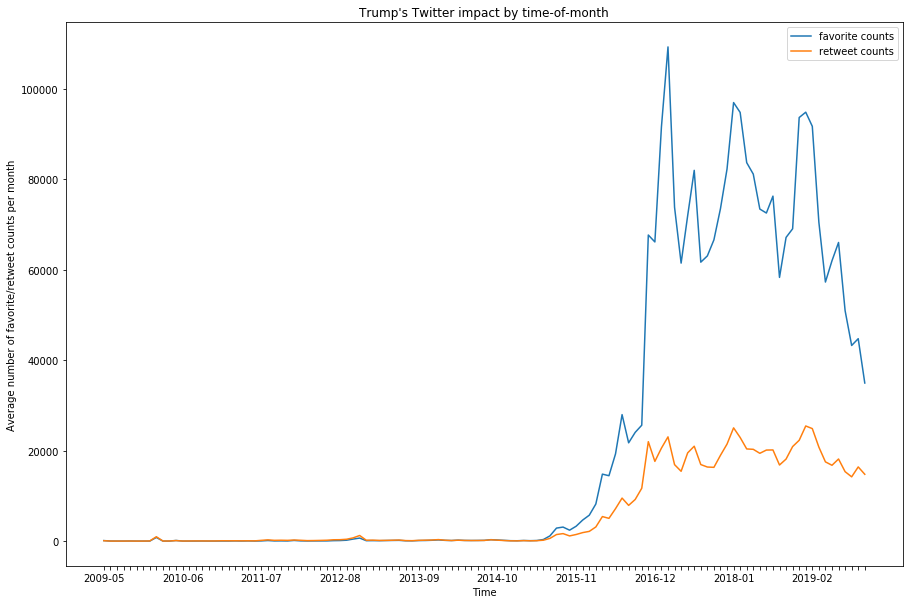

In [5]:
# measure the impact of Trump's Twitter over time

month2num = {'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '05', 'May': '05', 'Jun': '06',
             'Jul': '07', 'Aug': '08', 'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'}

def convert2year_month(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")    
    return time_parts[5] + '-' + month2num[time_parts[1]]

month2retweet_counts = {}
month2favorite_counts = {}

for twitter in data:
    month = convert2year_month(twitter['created_at'])
    if month not in month2retweet_counts:
        month2retweet_counts[month] = []
    month2retweet_counts[month].append(twitter['retweet_count'])
    
    if month not in month2favorite_counts:
        month2favorite_counts[month] = []
    month2favorite_counts[month].append(twitter['favorite_count'])
    
month2avg_retweets = {}
for month in month2retweet_counts:
    month2avg_retweets[month] = np.mean(month2retweet_counts[month])

month2avg_favorites = {}
for month in month2favorite_counts:
    month2avg_favorites[month] = np.mean(month2favorite_counts[month])
    
months = [m for m in month2retweet_counts.keys()]
months.sort()
avg_favorites = [month2avg_favorites[m] for m in months]
avg_retweets = [month2avg_retweets[m] for m in months]

months_ticks = [months[i] if i % 12 == 0 else '' for i in range(len(months))]

x_pos = np.arange(len(months))

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(x_pos, avg_favorites, label="favorite counts")
ax.plot(x_pos, avg_retweets, label="retweet counts")

ax.set_xticks(x_pos)
ax.set_xticklabels(months_ticks)

ax.set_xlabel('Time')
ax.set_ylabel('Average number of favorite/retweet counts per month')
ax.set_title('Trump\'s Twitter impact by time-of-month')
ax.legend()

plt.show()

2 Frequency Analysis

We are curious to how frequently does Donald use Twitter.

In [4]:
def convert2year_hour(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    year_str = time_parts[5]
    hour_str = time_parts[3][:2]
    
    return year_str, hour_str

# record each years number of tweets for each hour per day
num_tweets_2019 = [0] * 24
num_tweets_2018 = [0] * 24
num_tweets_2017 = [0] * 24
num_tweets_2016 = [0] * 24

for twitter in data:
    year, hour = convert2year_hour(twitter['created_at'])
    if year == '2019':
        num_tweets_2019[int(hour)] += 1
    elif year == '2018':
        num_tweets_2018[int(hour)] += 1
    elif year == '2017':
        num_tweets_2017[int(hour)] += 1
    elif year == '2016':
        num_tweets_2016[int(hour)] += 1

# get average number of tweets per day
num_tweets_per_day_2019 = [x / 319 for x in num_tweets_2019]
num_tweets_per_day_2018 = [x / 365 for x in num_tweets_2018]
num_tweets_per_day_2017 = [x / 365 for x in num_tweets_2017]
num_tweets_per_day_2016 = [x / 366 for x in num_tweets_2016]


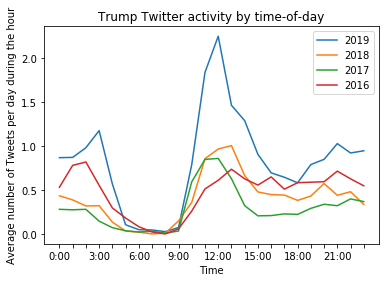

In [5]:
fig, ax = plt.subplots()
time_oclock = ['0:00', '', '', '3:00', '', '',
               '6:00', '', '', '9:00', '', '',
               '12:00', '', '', '15:00', '', '',
               '18:00', '', '', '21:00', '', '',]

x_pos = np.arange(len(time_oclock))

ax.plot(x_pos, num_tweets_per_day_2019, label="2019")
ax.plot(x_pos, num_tweets_per_day_2018, label="2018")
ax.plot(x_pos, num_tweets_per_day_2017, label="2017")
ax.plot(x_pos, num_tweets_per_day_2016, label="2016")

ax.set_xticks(x_pos)
ax.set_xticklabels(time_oclock)

ax.set_xlabel('Time')
ax.set_ylabel('Average number of Tweets per day during the hour')
ax.set_title('Trump Twitter activity by time-of-day')
ax.legend()
plt.show()

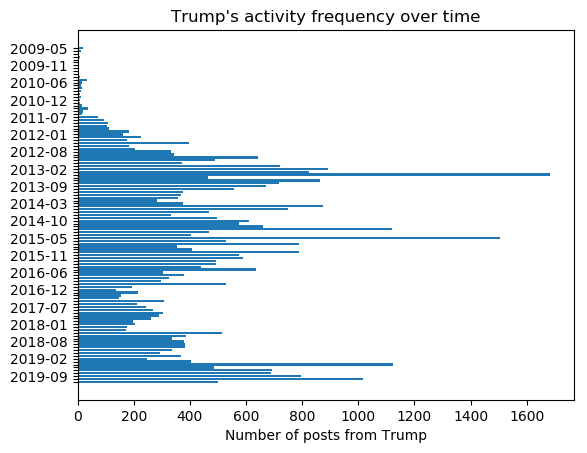

In [6]:
def convertTimeStamp(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")
    print(time_parts)
    date_str = time_parts[5] + '-' + month2num[time_parts[1]] + '-' + time_parts[2]
    time_str = time_parts[3]
    
    return date_str + ' ' + time_str

def convert2year_month(gmt_time_stamp):
    time_parts = gmt_time_stamp.split(" ")    
    return time_parts[5] + '-' + month2num[time_parts[1]]

year_months = []

for twitter in data:    
    year_months.append(convert2year_month(twitter['created_at']))
    
activities_over_time = collections.Counter(year_months).most_common()
activities_over_time.sort(key = lambda x : x[0])

plt.rcdefaults()
fig, ax = plt.subplots()

time_stamps = [activities_over_time[i][0] if i % 6 == 0 else '' for i in range(len(activities_over_time))]
y_pos = np.arange(len(time_stamps))
freqs = [x[1] for x in activities_over_time]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(time_stamps)
ax.invert_yaxis()
ax.set_xlabel('Number of posts from Trump')
ax.set_title('Trump\'s activity frequency over time' )
plt.show()

3 Interaction Analysis: Retweet and Mention

We are curious to see the people Donald cares about on Twitter.

In [7]:
retweet_num = 0
retweet_accounts = []

for twitter in data:
    if twitter['is_retweet']:
        retweet_num += 1
        retweet_accounts.append(twitter['retweet_account'])

print("Retweet acoounts for " + str(retweet_num/len(data)) + " percent of Donald Trump's Tweets")

Retweet acoounts for 0.07575189731097161 percent of Donald Trump's Tweets


As we can see around 7.5% of Donald's tweet are from retweet, which shows that Donald still wrote most of his tweets by himself.

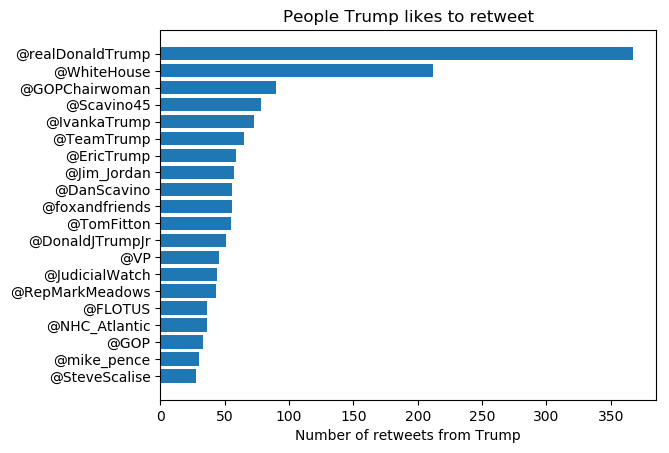

In [8]:
retweet_account2freq = collections.Counter(retweet_accounts)

most_common_accounts = retweet_account2freq.most_common(20)

plt.rcdefaults()
fig, ax = plt.subplots()

accounts = [x[0] for x in most_common_accounts]
y_pos = np.arange(len(accounts))
freqs = [x[1] for x in most_common_accounts]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(accounts)
ax.invert_yaxis()
ax.set_xlabel('Number of retweets from Trump')
ax.set_title('People Trump likes to retweet')
plt.show()


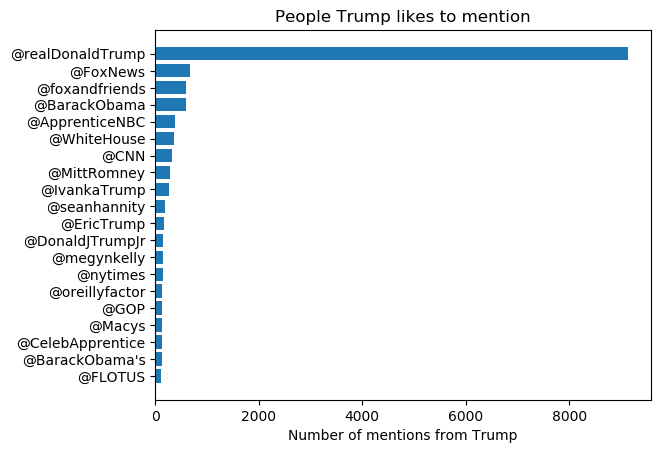

[('@realDonaldTrump', 9127), ('@FoxNews', 671), ('@foxandfriends', 603), ('@BarackObama', 590), ('@ApprenticeNBC', 391), ('@WhiteHouse', 362), ('@CNN', 317), ('@MittRomney', 277), ('@IvankaTrump', 269), ('@seanhannity', 195), ('@EricTrump', 164), ('@DonaldJTrumpJr', 152), ('@megynkelly', 152), ('@nytimes', 146), ('@oreillyfactor', 133), ('@GOP', 131), ('@Macys', 129), ('@CelebApprentice', 127), ("@BarackObama's", 125), ('@FLOTUS', 120)]


In [9]:
MENTION_PATTERN = re.compile(r'@\w*')
mentioned_accounts = []
for twitter in data:
    for word in twitter['tokenized_text']:
        if (re.match(MENTION_PATTERN, word) != None):
            mentioned_accounts.append(word)
            
most_common_mentioned_accounts = collections.Counter(mentioned_accounts).most_common(20)

plt.rcdefaults()
fig, ax = plt.subplots()

accounts = [x[0] for x in most_common_mentioned_accounts]
y_pos = np.arange(len(accounts))
freqs = [x[1] for x in most_common_mentioned_accounts]

ax.barh(y_pos, freqs, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(accounts)
ax.invert_yaxis()
ax.set_xlabel('Number of mentions from Trump')
ax.set_title('People Trump likes to mention')
plt.show()
print(most_common_mentioned_accounts)

4 language analysis

We would like to see the lingusitc pattern of Trump. To make the result more accurate, we only count the original tweet written by Donald in this analysis.

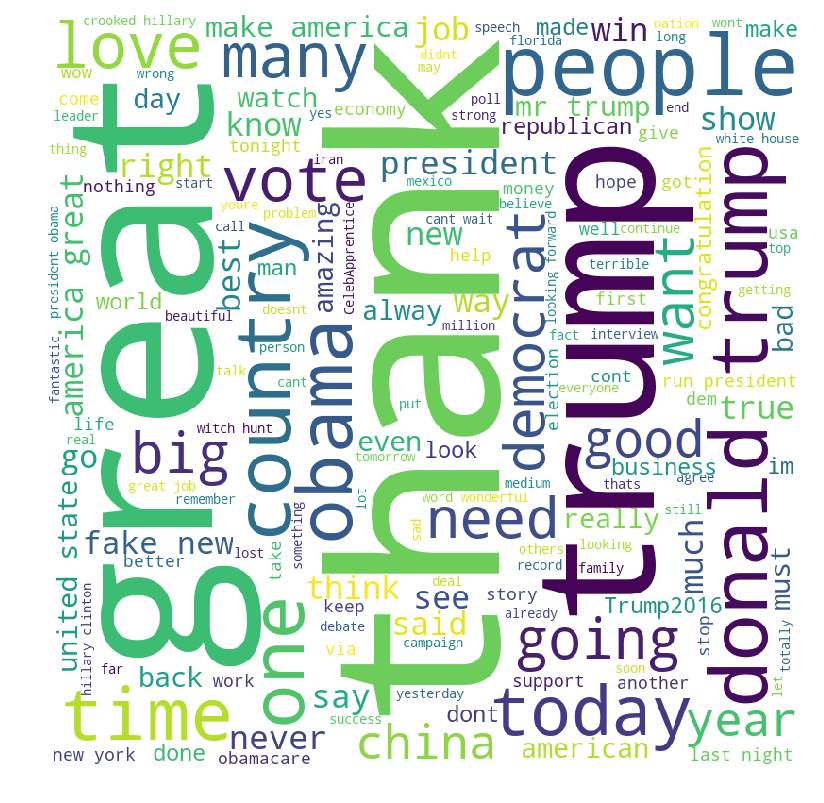

In [10]:
words = []
for twitter in data:
    if not twitter['is_retweet']:
        words += twitter['processed_text']

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(words)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()